## Calcular parametros estadisticos del artículo de la survey de Edu sobre una nube de puntos de robots(cada puntos en un robot)

1. Obtener nube de puntos

{'steps': 2000, 'time_step': 0.1, 'record_collisions': True, 'record_pose': True, 'runs': 10000, 'run_index': 0, 'scenario': {'type': 'Cross', 'agent_margin': 0.1, 'side': 4, 'target_margin': 0.1, 'tolerance': 0.5, 'groups': [{'type': 'thymio', 'number': 20, 'radius': 0.08, 'control_period': 0.1, 'speed_tolerance': 0.02, 'kinematics': {'type': '2WDiff', 'wheel_axis': 0.094, 'max_speed': 0.166}, 'behavior': {'type': 'HL', 'optimal_speed': 0.12, 'horizon': 5.0, 'tau': {'sampler': 'uniform', 'from': 0.0, 'to': 1.0, 'once': True}, 'eta': {'sampler': 'uniform', 'from': 0.0, 'to': 1.0, 'once': True}, 'safety_margin': {'sampler': 'uniform', 'from': 0.0, 'to': 0.1, 'once': True}}, 'state_estimation': {'type': 'Bounded', 'range_of_view': 5.0}}]}}


Property name range_of_view is deprecated for Bounded, use range instead


Duration:  0:00:00.251810


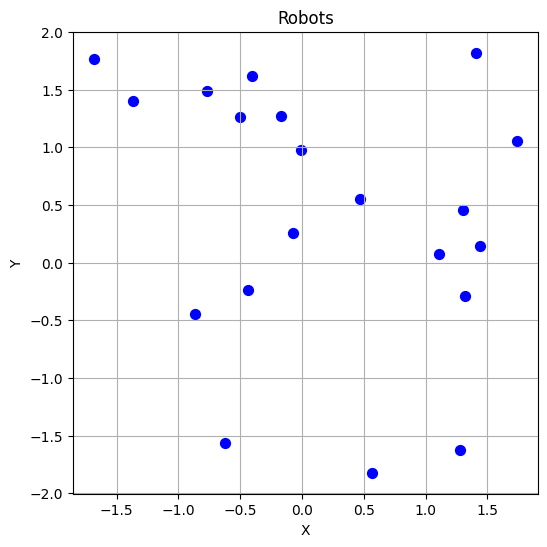

In [26]:
import numpy as np
import matplotlib.pyplot as plt

from navground import sim
import yaml
import pandas as pd
from scipy.spatial import distance_matrix
from utilsTopological import *
CONFIG_FILE = 'configTopological.yaml'

def obj_to_yaml(obj): return yaml.dump(obj)

def yaml_load(filename):
	r = ''
	with open(filename, 'r') as f:
		r = yaml.safe_load(f)
	return r

configYAML = yaml_load(CONFIG_FILE)
print(configYAML)
configYAML['runs'] = 1
exp = sim.load_experiment(obj_to_yaml(configYAML))
exp.run(number_of_threads=12)
print("Duration: ", exp.duration)
run = exp.runs[0]
world = run.world # sim.load_world(g.attrs['world'])
ps=run.poses
maxd = [float(np.max(distance_matrix(X,X))) for X in ps[:,:,:2]]

# Crear la nube de puntos
plt.figure(figsize=(6, 6))
plt.scatter(ps[0,:,0], ps[0,:, 1], color='blue', s=50)
plt.title('Robots')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()



2. Obtener diagrama persistencia

In [23]:
j=0
persistence = ComputePersistenceDiagram(ps,j,0,maxd[j],"rips")
persistenceL = limitingDiagram(persistence,maxd[j])
persistenceL

array([[0.        , 0.33239875],
       [0.        , 0.33334972],
       [0.        , 0.34013091],
       [0.        , 0.34103466],
       [0.        , 0.34953846],
       [0.        , 0.36687576],
       [0.        , 0.41837252],
       [0.        , 0.47334858],
       [0.        , 0.47686814],
       [0.        , 0.60261371],
       [0.        , 0.61485112],
       [0.        , 0.61861057],
       [0.        , 0.63995789],
       [0.        , 0.7406584 ],
       [0.        , 0.74160123],
       [0.        , 0.79950283],
       [0.        , 0.83329568],
       [0.        , 1.14913673],
       [0.        , 1.20887424],
       [0.        , 4.50114674]])

3 Calculating statistics vectorizations

In [24]:
# Function to calculate statistical metrics for a given data array
def calculate_statistics(data, label):
    statistics = {
        "mean": np.mean(data),
        "std_dev": np.std(data),
        "median": np.median(data),
        "IQR": np.percentile(data, 75) - np.percentile(data, 25),
        "range": np.max(data) - np.min(data),
        "10th_percentile": np.percentile(data, 10),
        "25th_percentile": np.percentile(data, 25),
        "75th_percentile": np.percentile(data, 75),
        "90th_percentile": np.percentile(data, 90)
    }
    print(f"Statistics for {label}:")
    for key, value in statistics.items():
        print(f"{key}: {value}")
    return statistics

# Extract p (births) and q (deaths) from the persistence intervals
def persistence_statistics(persistence_intervals):
    p = persistence_intervals[:, 0]  # births
    q = persistence_intervals[:, 1]  # deaths
    
    # Midpoints: (p + q) / 2
    midpoints = (p + q) / 2
    
    # Lifespans: q - p
    lifespans = q - p

    # Calculate statistics for each category
    p_stats = calculate_statistics(p, "Births (p)")
    q_stats = calculate_statistics(q, "Deaths (q)")
    midpoints_stats = calculate_statistics(midpoints, "Midpoints (p+q)/2")
    lifespans_stats = calculate_statistics(lifespans, "Lifespans (q-p)")

    # Count the total number of bars
    total_bars = len(persistence_intervals)
    print(f"Total number of bars (with multiplicity): {total_bars}")

    return {
        "births": p_stats,
        "deaths": q_stats,
        "midpoints": midpoints_stats,
        "lifespans": lifespans_stats,
        "total_bars": total_bars
    }

# Call the function to calculate statistics and count bars
persistence_statistics(persistenceL)


Statistics for Births (p):
mean: 0.0
std_dev: 0.0
median: 0.0
IQR: 0.0
range: 0.0
10th_percentile: 0.0
25th_percentile: 0.0
75th_percentile: 0.0
90th_percentile: 0.0
Statistics for Deaths (q):
mean: 0.7941083318109989
std_dev: 0.8869181066936838
median: 0.6087324116943104
IQR: 0.3935351959235161
range: 4.168747990089658
10th_percentile: 0.33945278995986333
25th_percentile: 0.3625414318714763
75th_percentile: 0.7560766277949924
90th_percentile: 1.1551104777983818
Statistics for Midpoints (p+q)/2:
mean: 0.39705416590549947
std_dev: 0.4434590533468419
median: 0.3043662058471552
IQR: 0.19676759796175805
range: 2.084373995044829
10th_percentile: 0.16972639497993167
25th_percentile: 0.18127071593573815
75th_percentile: 0.3780383138974962
90th_percentile: 0.5775552388991909
Statistics for Lifespans (q-p):
mean: 0.7941083318109989
std_dev: 0.8869181066936838
median: 0.6087324116943104
IQR: 0.3935351959235161
range: 4.168747990089658
10th_percentile: 0.33945278995986333
25th_percentile: 0.36254

{'births': {'mean': 0.0,
  'std_dev': 0.0,
  'median': 0.0,
  'IQR': 0.0,
  'range': 0.0,
  '10th_percentile': 0.0,
  '25th_percentile': 0.0,
  '75th_percentile': 0.0,
  '90th_percentile': 0.0},
 'deaths': {'mean': 0.7941083318109989,
  'std_dev': 0.8869181066936838,
  'median': 0.6087324116943104,
  'IQR': 0.3935351959235161,
  'range': 4.168747990089658,
  '10th_percentile': 0.33945278995986333,
  '25th_percentile': 0.3625414318714763,
  '75th_percentile': 0.7560766277949924,
  '90th_percentile': 1.1551104777983818},
 'midpoints': {'mean': 0.39705416590549947,
  'std_dev': 0.4434590533468419,
  'median': 0.3043662058471552,
  'IQR': 0.19676759796175805,
  'range': 2.084373995044829,
  '10th_percentile': 0.16972639497993167,
  '25th_percentile': 0.18127071593573815,
  '75th_percentile': 0.3780383138974962,
  '90th_percentile': 0.5775552388991909},
 'lifespans': {'mean': 0.7941083318109989,
  'std_dev': 0.8869181066936838,
  'median': 0.6087324116943104,
  'IQR': 0.3935351959235161,
  